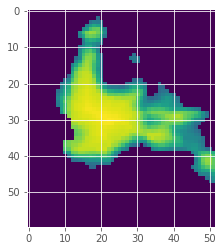

In [336]:
#Cargando librerías 
import importlib

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd

import positioning_sensors as ps
import regionGrowing as rg
importlib.reload(ps)
importlib.reload(rg)

import network_fitness as netfit
importlib.reload(netfit)

from geneticalgorithm import geneticalgorithm as ga

plt.style.use("ggplot")

##

from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.filters import rank

##

#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'
sigma_y = 0.7
sigma_x = 0.7
sigma = [sigma_y,sigma_x]

#Loading precalculated local and directed empirical variograms
data = pd.read_csv("th100_atol_15_dirdelta_1.csv")
variogram_set = np.array(data.iloc[:,3:])


#NLTI: luminance
luminance = ps.readIMG(ilumina)

#EAM: Environtmental attention map is the importance
EAM = ps.readIMG(niveles,invert=True)
#EAM[37][23]+=1

nonsat = ps.desaturate(luminance,th=62)

nonsat2 = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')
nonsat2 = (nonsat2>=22)*nonsat

plt.imshow(nonsat2)
plt.show()

Testing regionGrowing for Spatial Semivariance

In [337]:
import regionGrowing as rg
importlib.reload(rg)

<module 'regionGrowing' from '/Users/rodrigo/SourceCodes/git/optimal_light_sensor_location/regionGrowing.py'>

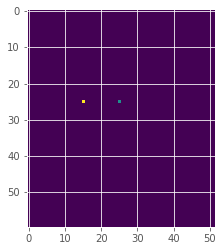

In [338]:
#si = (30,40)
#sj = (10,40)


GINT = nonsat2.astype(int)
z = np.zeros(GINT.shape)

si = (25,25)
sj = (np.random.randint(nonsat2.shape[0]),np.random.randint(nonsat2.shape[1]))
sj = (25,15)
z[si]=1
z[sj]=2

plt.imshow(z)

In [339]:
atol = 20
dtol = 0.5
params = {"type": "semivar", 
          "si": si, 
          "atol": atol, 
          "dtol": dtol}



In [340]:
sv = np.zeros(nonsat2.shape)
rG = rg.rGrowing(nonsat2) 

#Specific constraints for semivariance map

rG.setParams(params)
#sv1 = rG.makeSemivarianceMap(si)

#getValidCoordinates
for i in range(GINT.shape[0]):
    for j in range(GINT.shape[1]):
        sj = (i,j)
        seed = sj
        set_ri = rG.getRegion(seed)
        z[sj] = np.mean([(nonsat2[si]-nonsat2[c])**2   for c in rG.coords])/2
z[si] = 0


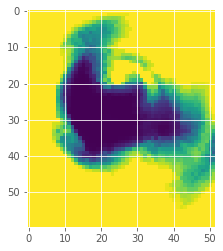

In [341]:
plt.imshow(z)
plt.show()

In [342]:
def neighb(sa,shape):
    import itertools as it
    
    N = list([])
    rng = list(range(-1,2))
    pr = it.product(rng,rng)
    
    
    
    for px in pr:

        y = sa[0]+px[0]
        y = 0 if y < 0 else y
        y = shape[0]-1 if y > shape[0]-1 else y

        x = sa[1]+px[1]
        x = 0 if x < 0 else x
        x = shape[1]-1 if x > shape[1]-1 else x
            
        N.append((y,x))
        
    return N
    
    
    

In [343]:
sai = np.argmin((np.sum((N - np.repeat([np.array(sb)], len(N), axis = 0))**2,axis=1))**0.5)
sa = N[sai]
sa


(30, 25)

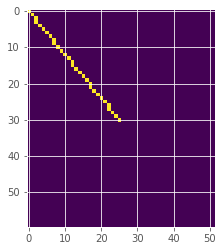

In [344]:
#import scipy.misc
#import numpy as np
from skimage.draw import line
img = np.zeros(nonsat.shape, dtype=np.uint8)
rr, cc = line(sa[0], sa[1], 0, 0)
img[rr, cc] = 1

#rr, cc, val = line_aa(sa[0], sa[1], 0, 26)
#img[rr, cc] = val*255#
plt.imshow(img)



In [65]:



line  = list([])
s0 = si

line.append(s0)
d = ((s0[0]-sj[0])**2 + (s0[1]-sj[1])**2)**(0.5)

Img = nonsat
visit = np.zeros(Img.shape)

sl=(1,1)

while(d!=0):
#for i in range(1):
    N = list([])
    rng = list(range(-1,2))
    pr = it.product(rng,rng)
    
    
    for px in pr:

        y = s0[0]+px[0]
        y = 0 if y < 0 else y
        y = Img.shape[0]-1 if y > Img.shape[0]-1 else y

        x = s0[1]+px[1]
        x = 0 if x < 0 else x
        x = Img.shape[1]-1 if x > Img.shape[1]-1 else x
            
        N.append((y,x))
        
    
    cmin = N[np.argmin(np.sum((np.array(N)-np.array(sl))**2,axis=1))]
    line.append(cmin)
    d = ((cmin[0]-sj[0])**2 + (cmin[1]-sj[1])**2)**(0.5)
    
    
    
    
np.array(N)

KeyboardInterrupt: 

In [56]:
dmin = N[np.argmin(np.sum((np.array(N)-np.array(sl))**2,axis=1))]
dmin

(24, 14)

In [39]:
np.array(N[0])-np.array(sj[0])

array([-35, -45])

In [40]:
sj



(59, 51)

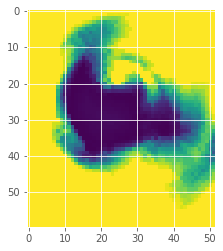

In [349]:
si  = (30,30)
sv1 = rG.makeSemivarianceMap(si)
plt.imshow(sv1)


In [350]:
#import scipy.misc
#import numpy as np
from skimage.draw import line

msk = np.zeros(nonsat.shape,dtype=np.uint8)

In [351]:
corner = list([])
for i in range(0,nonsat.shape[1]):
    corner.append((0,i))

for i in range(0,nonsat.shape[1]):
    corner.append((nonsat.shape[1]-1,i))
    
for i in range(0,nonsat.shape[0]):
    corner.append((i,0))

for i in range(0,nonsat.shape[0]):
    corner.append((i,nonsat.shape[1]-1))


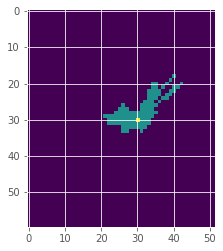

In [352]:

#for each coordinate in the corner of the region
for x in corner:
    
    #generate a line from the center
    rr, cc = line(si[0], si[1], x[0], x[1])
    
    # create a list where will be added all the values associated to 
    # the semivariance map
    
    l = list([])
    
    for i in range(len(rr)):
        a = (rr[i],cc[i])
        l.append(sv1[a])
    
    #calculate the differences
    derivative = np.array(l[1:] - np.array(l[:-1]))
    
    #we detect the first derivative detecting the decresase of semivariogram
    ix = np.where((derivative <= 0)*1==1)[0][0]
    
    #we mark this with one
    msk[rr[:ix+1],cc[:ix+1]] = 1

msk[si]=2
plt.imshow(msk)

In [334]:
derivative

array([1.05379724e+00, 3.32079331e-01, 5.42846055e+00, 4.80895283e+00,
       6.90047535e+01, 2.64413922e+02, 2.70220703e+02, 1.23129454e+03,
       2.13588017e+02, 1.28578265e+02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

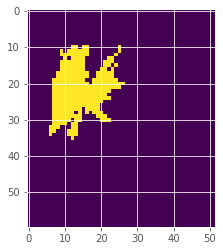

In [301]:


    
for x in range(0,nonsat.shape[0]):

    rr, cc = line(si[0], si[1], x,0)
    
    l = list([])
    
    #mejorar esto con un alista [rr,cc]
    for i in range(len(rr)):
        a = (rr[i],cc[i])
        l.append(sv1[a])
    
    derivative = np.array(l[1:] - np.array(l[:-1]))

    ix = np.where((derivative<=0)*1==1)[0][0]

    msk[rr[:ix+1],cc[:ix+1]]=1
    
    
plt.imshow(msk)

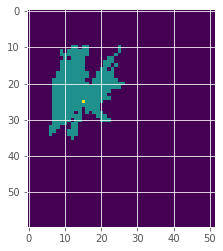

In [302]:
msk[si]=2

plt.imshow(msk)

In [294]:
si

(25, 15)

In [268]:
derivative[7]



13.865616166853528

In [173]:
l = list([])
for i in range(len(rr)):
    a = (rr[i],cc[i])
    l.append(sv1[a])



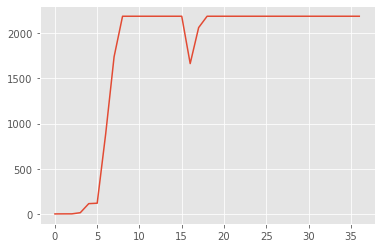

In [179]:
plt.plot(l)

In [195]:
l[0:9]

[0.0,
 0.5270075173385469,
 0.6966108636066903,
 13.32969358886291,
 113.7164632510077,
 118.6293601114313,
 882.5262184587217,
 1740.6818548190085,
 2188.723492590608,
 2188.723492590608]

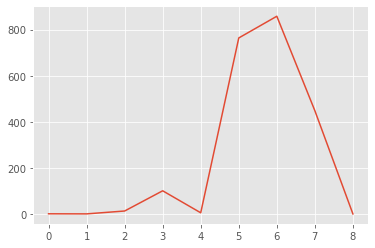

In [196]:
plt.plot(np.array(l[1:10])-np.array(l[0:9]))

In [241]:


derivative = np.array(l[1:] - np.array(l[:-1]))

ix = np.where((derivative<=0)*1==1)[0][0]

msk[rr[:ix],cc[:ix]]=1
plt.imshow(msk)

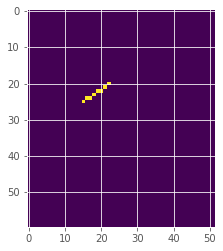

In [529]:
nonsat_coords = ps.get_coords(nonsat2>0)

semivariances = np.zeros((len(nonsat_coords),nonsat2.shape[0],nonsat2.shape[1]))
ncoords = len(nonsat_coords)
for i,coords in enumerate(nonsat_coords):
    print((100*i/ncoords))
    si = tuple(coords)
    semivariances[i] = rG.makeSemivarianceMap(si)

0.0
0.1124859392575928
0.2249718785151856
0.3374578177727784
0.4499437570303712
0.562429696287964
0.6749156355455568
0.7874015748031497
0.8998875140607424
1.0123734533183353


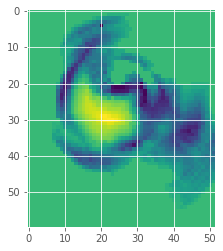

In [534]:
plt.imshow(semivariances[9])

In [466]:




print(semivariances.shape)

for i,coords in enum(nonsat_coords):
    sj = tuple(coords)
   
    
    
    
    
    

[ 0 13]
[ 0 14]
[ 0 15]
[ 0 16]
[ 0 17]
[ 0 18]
[ 0 19]
[ 0 20]
[ 0 21]
[ 0 22]
[ 0 23]
[ 0 24]
[ 1 12]
[ 1 13]
[ 1 14]
[ 1 15]
[ 1 16]
[ 1 17]
[ 1 18]
[ 1 19]
[ 1 20]
[ 1 21]
[ 1 22]
[ 1 23]
[ 1 24]
[ 2 11]
[ 2 12]
[ 2 13]
[ 2 14]
[ 2 15]
[ 2 16]
[ 2 17]
[ 2 18]
[ 2 19]
[ 2 20]
[ 2 21]
[ 2 22]
[ 2 23]
[ 2 24]
[3 9]
[ 3 10]
[ 3 11]
[ 3 12]
[ 3 13]
[ 3 14]
[ 3 15]
[ 3 16]
[ 3 17]
[ 3 18]
[ 3 19]
[ 3 20]
[ 3 21]
[ 3 22]
[ 3 23]
[ 3 24]
[4 9]
[ 4 10]
[ 4 11]
[ 4 12]
[ 4 13]
[ 4 14]
[ 4 15]
[ 4 16]
[ 4 17]
[ 4 18]
[ 4 19]
[ 4 20]
[ 4 21]
[ 4 22]
[ 4 23]
[ 4 24]
[5 9]
[ 5 10]
[ 5 11]
[ 5 12]
[ 5 13]
[ 5 14]
[ 5 15]
[ 5 16]
[ 5 17]
[ 5 18]
[ 5 19]
[ 5 20]
[ 5 21]
[ 5 22]
[ 5 23]
[ 5 24]
[6 9]
[ 6 10]
[ 6 11]
[ 6 12]
[ 6 13]
[ 6 14]
[ 6 15]
[ 6 16]
[ 6 17]
[ 6 18]
[ 6 19]
[ 6 20]
[ 6 21]
[ 6 22]
[ 6 23]
[ 6 24]
[7 9]
[ 7 10]
[ 7 11]
[ 7 12]
[ 7 13]
[ 7 14]
[ 7 15]
[ 7 16]
[ 7 17]
[ 7 18]
[ 7 19]
[ 7 20]
[ 7 21]
[ 7 22]
[ 7 23]
[ 7 24]
[8 8]
[8 9]
[ 8 10]
[ 8 11]
[ 8 12]
[ 8 13]
[ 8 14]
[ 8 15

In [1110]:
coords = si
mask = np.zeros(G.shape, dtype=bool)
mask[tuple(coords.T)] = True

markers, _ = ndi.label(mask)
labels = watershed(G, markers, mask=nonsat)

figure(figsize=(10, 10), dpi=80)

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

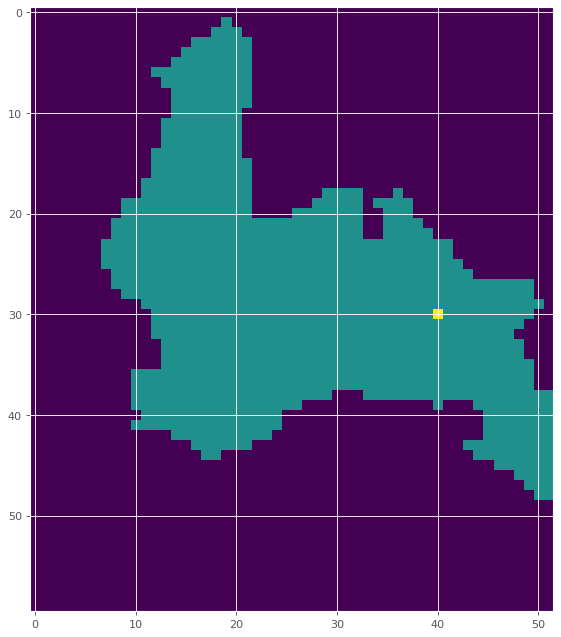

In [1337]:
figure(figsize=(10, 10), dpi=80)
mask = np.zeros(nonsat.shape, dtype=bool)
mask[tuple(coords.T)] = True

figure(figsize=(10, 10), dpi=80)
markers, _ = ndi.label(mask)
labels = watershed(G, markers, mask=(nonsat>0))
plt.imshow(labels+markers)
plt.show()

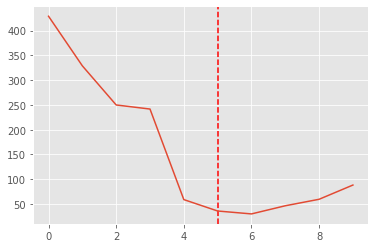

In [1336]:
plt.axvline(x=5, color='r', linestyle='--')
plt.plot(G[si[0]-5:si[0]+5,20])



In [1338]:
si

array([30, 40])

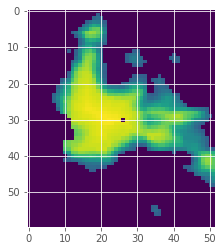

In [563]:
nonsat[30][26]=0

plt.imshow(nonsat)

In [317]:
def spatialSemivariance(si,I):
    """
    Returns gamma(si)
    """
    
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            sj=np.array(i,j)
            
            

In [272]:
sj[0]

50

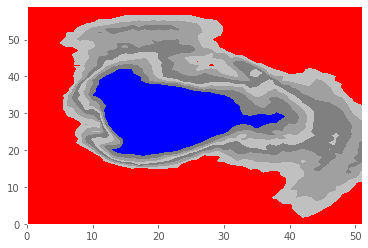

In [1182]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

cs = plt.contourf(np.flip(G,axis=0),
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()

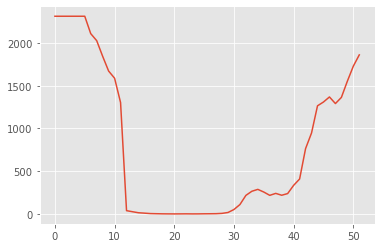

In [1183]:
plt.plot(G[30][:])

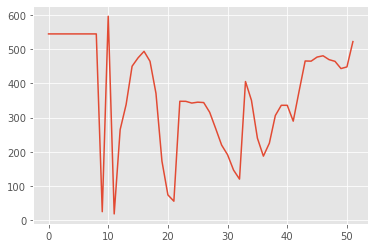

In [1014]:
plt.plot(G[20][:])

In [1]:
#referencias
#https://es.calcuworld.com/calculadoras-matematicas/trigonometria/arcotangente/
#https://www.engineeringtoolbox.com/slope-degrees-gradient-grade-d_1562.html

#simple growing region algoritm
#https://developpaper.com/simple-implementation-of-region-growing-in-python/

```hola```